In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [8]:
scaled_features[0:5]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137,  0.75587279,  2.03169299,
        -0.87015616,  2.59981844,  0.28570652, -0.68249379, -0.37784986],
       [ 0.9828405 ,  1.06019327, -0.62139875,  0.62529938,  0.45282034,
        -0.26722041,  1.75020756,  1.06649052,  1.24132463, -1.02698711],
       [ 1.13927548, -0.64039191, -0.70981864, -0.05717457,  0.82288616,
        -0.93677314,  0.59678173, -1.47235164,  1.04077225,  0.2765098 ]])

In [9]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [10]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


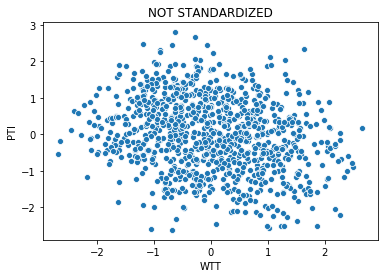

Text(0.5,1,'STANDARDIZED')

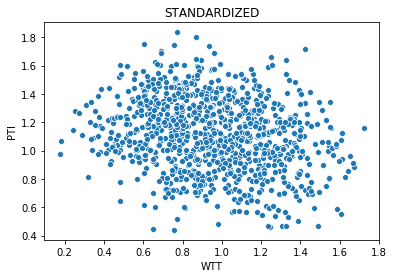

In [11]:
sns.scatterplot(df_feat['WTT'],df_feat['PTI'])
plt.title('NOT STANDARDIZED')
plt.show()
sns.scatterplot(df['WTT'],df['PTI'])
plt.title('STANDARDIZED')

The purpose of the above function is to normalize the data. To understand why this is necessary, KNN is clustering that takes Euclidean Distances points on our plane - meaning that the ordinary straight line distance between every point.

If our data is not standardized - for example one of our predictors has a range of 0-10, and another predictor has a range of 0-1000, we are not able to calculate the straight line distance between every point and have accurate results because the space between each point is not uniform, we are not using the same unit or scale to measure the distance between our predictors. 

To help gain an understanding to this look at the two plots as shown this is simply a scatterplot between the first two columnns from our data - the points chart, the distance between each point on the carteasan plane does not change, however the unit on the axis that is used to measure the distances between each plot has been converted to be uniform between all the data in our dataframe. 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
pred1 = knn1.predict(X_test)
pred1

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], d

The above is a set of values that shows the prediction value of our KNN Model using only 1 as our classifier. What this means is that we are only calculating our our predictions based on the closest one point. This often leads to high variance in our model as we are taking the closest points from our traning model, which can be refitted and over-fitting our data to the training data. Often this will result in higher error rates on our test data which will be identified below

In [18]:
from sklearn.metrics import (classification_report, confusion_matrix)

In [19]:
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[[144  16]
 [ 10 130]]
             precision    recall  f1-score   support

          0       0.94      0.90      0.92       160
          1       0.89      0.93      0.91       140

avg / total       0.91      0.91      0.91       300



In [20]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

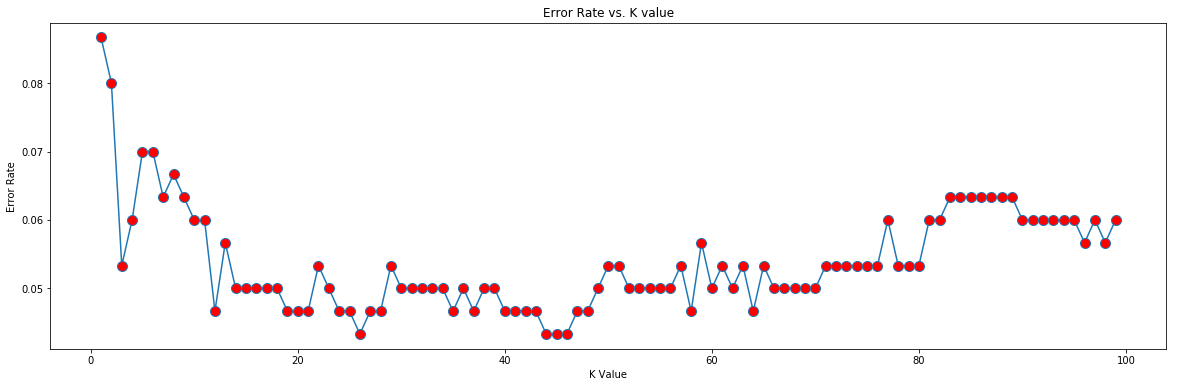

In [21]:
plt.figure(figsize = (20,6))
plt.plot(range(1,100), error_rate, marker = 'o',
        markerfacecolor = 'r', markersize = 10)
plt.title('Error Rate vs. K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

This is a plot that shows the error rate of our data using different K values from 1 to 100. Note that with a lower K value of 1 which we used in our previous model, we have a very high error rate - which decreases as we increase our K value to a more suitable number such as 37. 

Note that in the dataset that we have chosen even with a K classifier of 1, the error rate is approximately 0.1 which is already a very good error rate. 

In [22]:
print('K classifier 1')
print(confusion_matrix(y_test, pred1))
print('\n')
print(classification_report(y_test,pred1))

K classifier 1
[[144  16]
 [ 10 130]]


             precision    recall  f1-score   support

          0       0.94      0.90      0.92       160
          1       0.89      0.93      0.91       140

avg / total       0.91      0.91      0.91       300



In [23]:
knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
pred17 = knn17.predict(X_test)

print('K classifier 17')
print(confusion_matrix(y_test, pred17))
print('\n')
print(classification_report(y_test,pred17))

K classifier 17
[[149  11]
 [  4 136]]


             precision    recall  f1-score   support

          0       0.97      0.93      0.95       160
          1       0.93      0.97      0.95       140

avg / total       0.95      0.95      0.95       300



In [24]:
knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(X_train, y_train)
pred30 = knn30.predict(X_test)

print('K classifier 30')
print(confusion_matrix(y_test, pred30))
print('\n')
print(classification_report(y_test,pred30))

K classifier 30
[[149  11]
 [  4 136]]


             precision    recall  f1-score   support

          0       0.97      0.93      0.95       160
          1       0.93      0.97      0.95       140

avg / total       0.95      0.95      0.95       300



After utilizing the elbow method to discover the lowest error rate for each K value, we are able to find the most suitable K value for our data.

To understand the numbers that are shown:

    Precision = True Positive / (True Positive + False Positive)
    Precision is a percentage of how our model is able to accurately not label a positive sample as negative
    
    Recall = True Positive / (True Positive + False Negative) 
    Recall is how a percentage of how our model is able to accurately identify all positive samples
    
    F1 score is the harmonic mean between Precision and Recall
    
    Support is the number of occurances in each class
    
Overall - If we are using a K value of 30, this model is able to correctly classify our data given all the predictors into a target class result of either 0 or 1 with approximately 95% accuracy.